<a href="https://colab.research.google.com/github/pankaj140699/Traffic_Flow_Prediction/blob/main/CPG_155_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Creating files

In [ ]:
#Importing libraries
import pandas as pd
from sklearn import preprocessing
import datetime
import numpy as np
import os
import requests
import json
from time import sleep
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
import math
import warnings
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
#Data Preprocessing
#File Creation
for i in range(1,10):
  filename = 'd05_text_station_5min_2021_03_0{}.csv'.format(i)

  #loading data
  df = pd.read_csv('/content/drive/MyDrive/Data/'+ filename,header=None)

  #Dropping columns with all null values
  df.drop(columns =[x for x in range(18,52)],inplace=True)

  #Naming the columns
  df.columns = ['Timestamp','Station','District','Freeway','Direction of Travel','Lane Type','Station Length','Samples',
              '% Observed','Total Flow','Avg Occupancy','Avg Speed','Lane N Samples','Lane N Flow','Lane N Avg Occ',
              'Lane N','Avg Speed_1','Lane N Observed']
  
  #Filtering LANE-TYPE
  filt = (df['Lane Type'] == 'ML')
  df = df[filt]
  df.reset_index(inplace=True)

  #Dropping columns having no relevance
  df.drop(columns =['District','Freeway','Lane Type','Station Length','Samples','% Observed','Lane N Samples',
                    'Lane N','Avg Speed_1','Lane N Flow','Lane N Avg Occ','Lane N Observed'],inplace = True)
  df.drop(columns=['index','Direction of Travel'],inplace=True)
  k = df['Station'].nunique() #Unique Sensors 
  print(k)
  with open('/content/drive/MyDrive/Data Files/File1.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Total Flow'].values.astype(str))
      file1.write(row+'\n')
  with open('/content/drive/MyDrive/Data Files/File2.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Avg Occupancy'].values.astype(str))
      file1.write(row+'\n')  
  with open('/content/drive/MyDrive/Data Files/File3.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Avg Speed'].values.astype(str))
      file1.write(row+'\n')      

In [ ]:
df.head(10)

,Timestamp,Station,Total Flow,Avg Occupancy,Avg Speed
0,03/09/2021 00:00:00,500010011,1.0,0.0010,65.0
1,03/09/2021 00:00:00,500010012,2.0,0.0018,65.0
2,03/09/2021 00:00:00,500010021,3.0,0.0019,69.2
3,03/09/2021 00:00:00,500010022,4.0,0.0037,65.0
4,03/09/2021 00:00:00,500010031,8.0,0.0040,66.6
5,03/09/2021 00:00:00,500010032,8.0,0.0082,65.0
6,03/09/2021 00:00:00,500010041,11.0,0.0054,66.8
7,03/09/2021 00:00:00,500010042,9.0,0.0047,68.5
8,03/09/2021 00:00:00,500010051,7.0,0.0034,66.8
9,03/09/2021 00:00:00,500010052,6.0,0.0027,68.2


In [ ]:
#Data Preprocessing
#File Creation
for i in range(10,32): #CHANGE HERE
  filename = 'd05_text_station_5min_2021_03_{}.csv'.format(i)

  #loading data
  df = pd.read_csv('/content/drive/MyDrive/Data/'+ filename,header=None)

  #Dropping columns with all null values
  df.drop(columns =[x for x in range(18,52)],inplace=True)

  #Naming the columns
  df.columns = ['Timestamp','Station','District','Freeway','Direction of Travel','Lane Type','Station Length','Samples',
              '% Observed','Total Flow','Avg Occupancy','Avg Speed','Lane N Samples','Lane N Flow','Lane N Avg Occ',
              'Lane N','Avg Speed_1','Lane N Observed']
  
  #Filtering LANE-TYPE
  filt = (df['Lane Type'] == 'ML')
  df = df[filt]
  df.reset_index(inplace=True)

  #Dropping columns having no relevance
  df.drop(columns =['District','Freeway','Lane Type','Station Length','Samples','% Observed','Lane N Samples',
                    'Lane N','Avg Speed_1','Lane N Flow','Lane N Avg Occ','Lane N Observed'],inplace = True)
  df.drop(columns=['index','Direction of Travel'],inplace=True)
  k = df['Station'].nunique() #Unique Sensors 
  print(k)
  with open('/content/drive/MyDrive/Data Files/File1.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Total Flow'].values.astype(str))
      file1.write(row+'\n')
  with open('/content/drive/MyDrive/Data Files/File2.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Avg Occupancy'].values.astype(str))
      file1.write(row+'\n')  
  with open('/content/drive/MyDrive/Data Files/File3.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Avg Speed'].values.astype(str))
      file1.write(row+'\n')      

In [ ]:
data=pd.read_excel('/content/Total Flow1.xls',header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,2021-03-01,3,1,4,2,1,6,2,5,4,4,10,8,7,10,14,7,11,13,14,10,11,16,10,17,10,18,18,11,25,12,22,28,23,23,17,5,8,6,9,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,2021-03-01,1,1,1,1,10,1,8,2,0,0,10,5,6,9,7,6,5,9,11,3,4,10,4,10,7,14,10,7,12,9,11,17,18,11,12,7,8,4,8,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,2021-03-01,0,1,0,1,6,3,5,3,6,4,5,6,4,5,8,7,10,8,10,9,10,12,10,12,5,11,12,5,8,6,6,11,14,8,12,3,8,1,4,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,2021-03-01,0,0,0,1,2,5,4,5,2,3,7,6,7,7,7,5,2,7,7,3,3,7,0,6,1,11,11,1,14,4,9,20,14,7,11,5,7,4,6,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,2021-03-01,0,1,0,1,3,2,3,0,4,2,4,1,0,4,7,0,1,6,5,0,1,8,1,9,4,11,8,3,9,5,7,15,19,6,11,3,6,4,8,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0


SENSOR SELECTION

METHOD1: CORRELATION

In [ ]:
x=pd.read_csv('/content/Total Flow.csv',header=None)

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,3.0,1.0,4.0,2.0,1.0,6.0,2.0,5.0,4.0,4.0,10.0,8.0,7.0,10.0,14.0,7.0,11.0,13.0,14.0,10.0,11.0,16.0,10.0,17.0,10.0,18.0,18.0,11.0,25.0,12.0,22.0,28.0,23.0,23.0,17.0,5.0,8.0,6.0,9.0,5.0,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,1.0,1.0,1.0,1.0,10.0,1.0,8.0,2.0,0.0,0.0,10.0,5.0,6.0,9.0,7.0,6.0,5.0,9.0,11.0,3.0,4.0,10.0,4.0,10.0,7.0,14.0,10.0,7.0,12.0,9.0,11.0,17.0,18.0,11.0,12.0,7.0,8.0,4.0,8.0,4.0,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,0.0,1.0,0.0,1.0,6.0,3.0,5.0,3.0,6.0,4.0,5.0,6.0,4.0,5.0,8.0,7.0,10.0,8.0,10.0,9.0,10.0,12.0,10.0,12.0,5.0,11.0,12.0,5.0,8.0,6.0,6.0,11.0,14.0,8.0,12.0,3.0,8.0,1.0,4.0,7.0,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,0.0,0.0,0.0,1.0,2.0,5.0,4.0,5.0,2.0,3.0,7.0,6.0,7.0,7.0,7.0,5.0,2.0,7.0,7.0,3.0,3.0,7.0,0.0,6.0,1.0,11.0,11.0,1.0,14.0,4.0,9.0,20.0,14.0,7.0,11.0,5.0,7.0,4.0,6.0,5.0,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,0.0,1.0,0.0,1.0,3.0,2.0,3.0,0.0,4.0,2.0,4.0,1.0,0.0,4.0,7.0,0.0,1.0,6.0,5.0,0.0,1.0,8.0,1.0,9.0,4.0,11.0,8.0,3.0,9.0,5.0,7.0,15.0,19.0,6.0,11.0,3.0,6.0,4.0,8.0,4.0,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0


In [ ]:
index_max_cor=np.argsort(x.corr()[0])[::-1][1:31]

In [ ]:
index_max_cor=list(index_max_cor)  # index 0 represent 1st sensor

In [ ]:
index_max_cor

[2,
 65,
 67,
 49,
 60,
 51,
 54,
 55,
 58,
 3,
 48,
 53,
 61,
 50,
 68,
 57,
 122,
 1,
 56,
 66,
 370,
 350,
 76,
 72,
 8,
 363,
 123,
 64,
 52,
 154]

METHOD2: SHORTEST ON-ROAD DISTANCE + AVG. OCCUPANCY

STEP1: CALCULATING DISTANCE BTW ALL SENSORS

READING META-DATA FILE(LATITUDE/LONGITUDE OF SENSORS)

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/metadata.xlsx',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,500010011,1,N,5,53,NaN,72.33,322.865,36.535850,-121.912881,2.713,ML,1,CARMEL RIV BRIDGE HWY 1 NB VDS M,1
1,500010012,1,S,5,53,NaN,72.331,322.800,36.535860,-121.912870,2.714,ML,1,CARMEL RIV BRIDGE HWY 1 NB VDS M,1
2,500010021,1,N,5,53,NaN,72.757,323.292,36.541075,-121.908778,0.697,ML,2,CARMEL VALLEY RD HWY 1 NB VDS ML,1
3,500010022,1,S,5,53,NaN,72.758,323.227,36.541106,-121.908820,0.698,ML,1,CARMEL VALLEY RD HWY 1 NB VDS ML,1
4,500010031,1,N,5,53,NaN,73.726,324.261,36.554647,-121.910926,0.831,ML,2,OCEAN AVE HWY 1 NB VDS MLNB NB,1


In [ ]:
df=df[df[11]=='ML']
df.shape

(374, 15)

In [ ]:
df11=pd.DataFrame()
df11=df11.append(df.iloc[:,[0,9,8]],ignore_index=True)
df11.columns=['sensor_id','longi','lati']

In [ ]:
df11.head()

,sensor_id,longi,lati
0,500010011,-121.912881,36.535850
1,500010012,-121.912870,36.535860
2,500010021,-121.908778,36.541075
3,500010022,-121.908820,36.541106
4,500010031,-121.910926,36.554647


In [ ]:
df11.shape

(374, 3)

In [ ]:
headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': '5b3ce3597851110001cf6248536ef0af8e964986a3e9dbdf82145e52',
    'Content-Type': 'application/json; charset=utf-8'
}
def calculate_distance(df11,i):
  # longi1=str(longi1)
  # lati1=str(lati1)
  # longi2=str(longi2)
  # lati2=str(lati2)
  longi=np.array(df11['longi'])
  longi=np.expand_dims(longi,1)
  
  lati=np.array(df11['lati'])
  lati=np.expand_dims(lati,1)
  locat=np.concatenate((longi,lati),axis=1)
  body = {"locations":locat.tolist(),'metrics':['distance'],'units':'km','sources':[i]}
  call = requests.post('https://api.openrouteservice.org/v2/matrix/driving-car',json=body, headers=headers)
  # print(call.status_code, call.reason)
  c=call.text
  # print(c)
  # print(call.text)
  res = json.loads(c)
  # print(type(res['distances'][0]))
  dist=res['distances'][0]
  return dist

In [ ]:
arr=np.zeros((374,374))
dist=pd.DataFrame(arr)

In [ ]:
c=0
for i in range(dist.shape[0]):
    c+=1
    if(c%40==0):     
      sleep(60) # Time in seconds
    dist[i]=calculate_distance(df11,i)

KeyboardInterrupt: ignored

In [ ]:
dist.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.00,0.00,0.69,0.69,2.24,2.24,3.35,3.35,7.58,4.27,11.22,5.23,6.29,6.29,8.99,7.46,8.58,11.30,9.21,9.20,9.66,10.20,10.04,11.43,10.80,11.95,15.42,11.63,21.53,13.11,14.03,20.59,19.73,14.90,22.43,17.09,22.41,19.30,25.47,20.38,...,58.73,59.81,59.81,65.27,65.27,66.30,66.30,68.61,73.48,73.49,78.38,78.38,11.40,11.42,10.18,10.18,11.99,11.99,14.57,14.57,17.45,17.47,19.35,19.36,20.64,20.65,22.13,22.13,23.56,23.57,24.61,24.61,26.33,26.33,29.00,29.00,33.48,33.47,32.74,32.74
1,0.00,0.00,0.69,0.69,2.24,2.24,3.35,3.35,7.58,4.27,11.22,5.23,6.29,6.29,8.99,7.46,8.57,11.30,9.20,9.20,9.66,10.20,10.04,11.43,10.79,11.95,15.42,11.63,21.52,13.11,14.03,20.59,19.73,14.90,22.43,17.09,22.41,19.30,25.47,20.38,...,58.73,59.81,59.81,65.27,65.27,66.30,66.30,68.61,73.48,73.48,78.38,78.38,11.40,11.41,10.18,10.18,11.99,11.99,14.57,14.57,17.45,17.47,19.35,19.35,20.64,20.65,22.13,22.13,23.56,23.56,24.60,24.61,26.32,26.33,29.00,29.00,33.47,33.47,32.74,32.74
2,0.69,0.69,0.00,0.00,1.55,1.55,2.66,2.66,6.89,3.58,10.53,4.54,5.60,5.60,8.30,6.77,7.89,10.61,8.52,8.51,8.97,9.51,9.35,10.74,10.10,11.26,14.73,10.94,20.83,12.42,13.34,19.90,19.04,14.21,21.74,16.40,21.72,18.61,24.78,19.69,...,58.04,59.12,59.12,64.58,64.58,65.61,65.61,67.92,72.79,72.79,77.69,77.69,10.71,10.72,9.49,9.49,11.30,11.30,13.88,13.88,16.76,16.78,18.66,18.67,19.95,19.96,21.44,21.44,22.87,22.88,23.92,23.92,25.63,25.64,28.31,28.31,32.78,32.78,32.05,32.05
3,0.69,0.69,0.00,0.00,1.55,1.55,2.66,2.66,6.89,3.57,10.53,4.54,5.60,5.60,8.30,6.77,7.88,10.61,8.51,8.51,8.97,9.51,9.35,10.74,10.10,11.26,14.73,10.94,20.83,12.42,13.34,19.90,19.04,14.21,21.74,16.40,21.72,18.60,24.78,19.69,...,58.04,59.12,59.12,64.58,64.58,65.61,65.61,67.92,72.79,72.79,77.69,77.69,10.71,10.72,9.49,9.49,11.30,11.30,13.88,13.88,16.76,16.78,18.66,18.66,19.95,19.95,21.44,21.44,22.87,22.87,23.91,23.92,25.63,25.64,28.31,28.31,32.78,32.78,32.05,32.05
4,2.24,2.24,1.55,1.55,0.00,0.00,1.11,1.11,5.34,2.03,8.98,2.99,4.05,4.05,6.75,5.22,6.33,9.06,6.96,6.96,7.42,7.96,7.80,9.19,8.55,9.71,13.18,9.39,19.28,10.87,11.79,18.35,17.49,12.66,20.19,14.85,20.17,17.06,23.23,18.14,...,56.49,57.57,57.57,63.03,63.03,64.06,64.06,66.37,71.24,71.24,76.14,76.14,9.16,9.17,7.94,7.94,9.75,9.75,12.33,12.33,15.21,15.23,17.11,17.11,18.40,18.41,19.89,19.89,21.32,21.32,22.36,22.37,24.08,24.09,26.76,26.76,31.23,31.23,30.50,30.50
5,2.24,2.24,1.55,1.55,0.00,0.00,1.11,1.11,5.34,2.02,8.98,2.99,4.05,4.05,6.75,5.22,6.33,9.06,6.96,6.96,7.42,7.96,7.80,9.19,8.55,9.71,13.18,9.39,19.28,10.87,11.79,18.35,17.49,12.65,20.19,14.85,20.17,17.05,23.23,18.14,...,56.49,57.57,57.56,63.03,63.03,64.06,64.06,66.37,71.24,71.24,76.14,76.14,9.16,9.17,7.93,7.94,9.74,9.75,12.33,12.33,15.21,15.23,17.11,17.11,18.40,18.40,19.89,19.89,21.32,21.32,22.36,22.37,24.08,24.08,26.76,26.76,31.23,31.23,30.50,30.49
6,3.35,3.35,2.66,2.66,1.11,1.11,0.00,0.00,4.23,0.92,7.87,1.88,2.94,2.94,5.64,4.11,5.23,7.95,5.86,5.85,6.31,6.85,6.69,8.08,7.45,8.60,12.07,8.28,18.18,9.76,10.69,17.24,16.38,11.55,19.08,13.74,19.06,15.95,22.12,17.04,...,55.38,56.46,56.46,61.92,61.92,62.95,62.95,65.26,70.13,70.14,75.03,75.03,8.05,8.07,6.83,6.83,8.64,8.64,11.22,11.22,14.11,14.12,16.01,16.01,17.30,17.30,18.78,18.78,20.22,20.22,21.26,21.26,22.98,22.98,25.65,25.65,30.13,30.12,29.39,29.39
7,3.35,3.35,2.66,2.66,1.11,1.11,0.00,0.00,4.23,0.92,7.87,1.88,2.94,2.94,5.64,4.11,5.23,7.95,5.86,5.85,6.31,6.85,6.69,8.08,7.44,8.60,12.07,8.28,18.17,9.76,10.68,17.24,16.38,11.55,19.08,13.74,19.06,15.95,22.12,17.03,...,55.38,56.46,56.46,61.92,61.92,62.95,62.95,65.26,70.13,70.13,75.03,75.03,8.05,8.06,6.83,6.83,8.64,8.64,11.22,11.22,14.10,14.12,16.00,16.01,17.29,17.30,18.78,18.78,20.21,20.22,21.26,21.26,22.97,22.98,25.65,25.65,30.12,30.12,29.39,29.39
8,4.26,4.26,3.57,3.57,2.02,2.02,0.91,0.91,0.00,1.02,7.9

In [ ]:
dist.to_csv('distance_sensors.csv',index=False)

In [ ]:
dist=pd.read_csv('/content/distance_sensors.csv')

In [ ]:
dist.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '364', '365', '366', '367', '368', '369', '370', '371', '372', '373'],
      dtype='object', length=374)

In [ ]:
dist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.00,0.00,0.69,0.69,2.24,2.24,3.35,3.35,7.58,4.27,11.22,5.23,6.29,6.29,8.99,7.46,8.58,11.30,9.21,9.20,9.66,10.20,10.04,11.43,10.80,11.95,15.42,11.63,21.53,13.11,14.03,20.59,19.73,14.90,22.43,17.09,22.41,19.30,25.47,20.38,...,58.73,59.81,59.81,65.27,65.27,66.30,66.30,68.61,73.48,73.49,78.38,78.38,11.40,11.42,10.18,10.18,11.99,11.99,14.57,14.57,17.45,17.47,19.35,19.36,20.64,20.65,22.13,22.13,23.56,23.57,24.61,24.61,26.33,26.33,29.00,29.00,33.48,33.47,32.74,32.74
1,0.00,0.00,0.69,0.69,2.24,2.24,3.35,3.35,7.58,4.27,11.22,5.23,6.29,6.29,8.99,7.46,8.57,11.30,9.20,9.20,9.66,10.20,10.04,11.43,10.79,11.95,15.42,11.63,21.52,13.11,14.03,20.59,19.73,14.90,22.43,17.09,22.41,19.30,25.47,20.38,...,58.73,59.81,59.81,65.27,65.27,66.30,66.30,68.61,73.48,73.48,78.38,78.38,11.40,11.41,10.18,10.18,11.99,11.99,14.57,14.57,17.45,17.47,19.35,19.35,20.64,20.65,22.13,22.13,23.56,23.56,24.60,24.61,26.32,26.33,29.00,29.00,33.47,33.47,32.74,32.74
2,0.69,0.69,0.00,0.00,1.55,1.55,2.66,2.66,6.89,3.58,10.53,4.54,5.60,5.60,8.30,6.77,7.89,10.61,8.52,8.51,8.97,9.51,9.35,10.74,10.10,11.26,14.73,10.94,20.83,12.42,13.34,19.90,19.04,14.21,21.74,16.40,21.72,18.61,24.78,19.69,...,58.04,59.12,59.12,64.58,64.58,65.61,65.61,67.92,72.79,72.79,77.69,77.69,10.71,10.72,9.49,9.49,11.30,11.30,13.88,13.88,16.76,16.78,18.66,18.67,19.95,19.96,21.44,21.44,22.87,22.88,23.92,23.92,25.63,25.64,28.31,28.31,32.78,32.78,32.05,32.05
3,0.69,0.69,0.00,0.00,1.55,1.55,2.66,2.66,6.89,3.57,10.53,4.54,5.60,5.60,8.30,6.77,7.88,10.61,8.51,8.51,8.97,9.51,9.35,10.74,10.10,11.26,14.73,10.94,20.83,12.42,13.34,19.90,19.04,14.21,21.74,16.40,21.72,18.60,24.78,19.69,...,58.04,59.12,59.12,64.58,64.58,65.61,65.61,67.92,72.79,72.79,77.69,77.69,10.71,10.72,9.49,9.49,11.30,11.30,13.88,13.88,16.76,16.78,18.66,18.66,19.95,19.95,21.44,21.44,22.87,22.87,23.91,23.92,25.63,25.64,28.31,28.31,32.78,32.78,32.05,32.05
4,2.24,2.24,1.55,1.55,0.00,0.00,1.11,1.11,5.34,2.03,8.98,2.99,4.05,4.05,6.75,5.22,6.33,9.06,6.96,6.96,7.42,7.96,7.80,9.19,8.55,9.71,13.18,9.39,19.28,10.87,11.79,18.35,17.49,12.66,20.19,14.85,20.17,17.06,23.23,18.14,...,56.49,57.57,57.57,63.03,63.03,64.06,64.06,66.37,71.24,71.24,76.14,76.14,9.16,9.17,7.94,7.94,9.75,9.75,12.33,12.33,15.21,15.23,17.11,17.11,18.40,18.41,19.89,19.89,21.32,21.32,22.36,22.37,24.08,24.09,26.76,26.76,31.23,31.23,30.50,30.50


In [ ]:
dist.shape

(374, 374)

In [ ]:
dist=dist['0']

In [ ]:
dist.head()

0    0.00
1    0.00
2    0.69
3    0.69
4    2.24
Name: 0, dtype: float64

In [ ]:
dist.shape

(374,)

In [ ]:
sorted(dist)[1:41]

[0.0,
 0.69,
 0.69,
 2.24,
 2.24,
 3.35,
 3.35,
 4.26,
 5.07,
 5.21,
 6.61,
 7.44,
 8.97,
 9.11,
 9.5,
 9.51,
 9.65,
 10.03,
 10.14,
 10.14,
 10.19,
 10.65,
 10.65,
 10.73,
 10.74,
 10.8,
 11.28,
 11.42,
 11.63,
 11.85,
 11.85,
 11.96,
 13.1,
 13.95,
 14.04,
 14.43,
 14.43,
 14.9,
 15.42,
 16.8]

In [ ]:
index_min_dist=np.argsort(dist[::1])[:41]

In [ ]:
index_min_dist # here 0th index is our 1st sensor(reference sensor)

0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10     10
11     11
12     14
13     15
14     17
15    347
16    346
17     21
18     23
19     13
20     12
21     20
22     18
23     19
24    349
25    348
26     25
27     16
28     22
29     26
30    350
31    351
32     24
33     28
34     29
35     31
36    353
37    352
38     32
39     27
40     34
Name: 0, dtype: int64

STEP2: AVG. OCCUPANCY

In [ ]:
speed=pd.read_csv('/content/Avg_Speed.csv',header=None)

In [ ]:
speed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,65.0,65.0,69.7,65.0,71.2,65.0,71.2,67.5,71.2,65.1,66.9,65.1,65.1,66.3,66.8,66.0,66.2,66.5,67.7,66.3,69.7,69.1,66.9,66.9,66.3,69.4,67.8,67.3,67.1,66.6,67.2,68.5,68.1,67.2,68.7,68.8,67.4,67.1,66.5,66.3,...,68.6,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,66.0,67.5,65.0,66.3,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,67.1,65.1,66.3,65.1,67.1,65.1
1,65.0,64.8,65.0,65.0,65.9,65.0,65.7,68.3,68.2,68.2,65.0,65.1,66.0,65.7,65.7,65.9,65.1,65.7,65.7,64.9,69.6,70.1,65.0,66.3,65.0,69.0,66.3,65.1,66.6,67.1,68.4,68.8,66.3,67.0,67.6,68.6,68.1,68.2,67.4,68.1,...,66.3,64.9,65.1,64.9,65.0,64.9,65.0,64.9,65.0,65.0,65.1,65.1,65.9,71.2,65.0,71.1,65.0,65.1,65.0,65.0,64.9,64.9,65.0,65.0,65.0,64.9,64.9,65.0,65.0,64.9,65.0,65.0,65.0,64.9,69.1,68.2,67.1,65.1,65.1,67.5
2,65.0,64.6,68.1,64.7,68.2,64.7,66.2,65.0,67.1,66.6,67.5,65.0,66.6,66.3,66.4,66.7,67.5,67.3,66.4,67.1,70.3,70.1,66.9,66.6,67.5,70.3,66.6,66.2,66.6,66.0,65.4,66.9,67.8,68.7,69.2,71.2,69.6,71.2,68.1,66.0,...,65.1,65.1,65.1,64.5,65.1,64.9,65.0,64.9,65.0,65.0,65.1,65.0,65.9,71.1,64.9,67.2,65.0,65.1,65.0,64.9,64.9,64.9,64.9,64.9,65.0,64.9,65.0,65.0,65.0,64.9,65.0,65.0,65.0,64.9,67.2,65.1,67.4,68.2,68.2,66.5
3,65.0,64.6,68.1,64.7,65.2,64.7,68.1,67.5,65.1,68.9,66.1,67.2,67.8,66.8,66.8,66.2,65.1,66.8,67.9,65.1,67.3,70.7,68.1,68.2,71.2,69.8,66.8,65.1,66.8,65.2,67.7,67.9,68.7,69.1,67.9,70.0,68.5,69.7,67.1,66.3,...,66.6,65.1,65.1,64.7,65.0,65.1,65.0,64.9,65.1,65.0,65.0,65.0,66.0,71.0,65.0,68.1,65.0,65.1,65.0,65.0,65.0,64.9,65.0,64.9,64.9,65.1,65.1,65.0,65.1,65.0,65.1,64.9,64.9,64.9,67.5,68.2,68.1,64.9,68.2,67.2
4,65.0,64.8,68.1,64.8,67.2,64.7,67.2,68.2,68.1,70.7,66.7,71.1,68.2,66.6,66.0,68.1,65.2,65.1,65.2,68.2,71.8,67.1,71.1,65.2,66.5,69.1,65.9,67.1,66.5,67.6,67.0,68.4,67.3,68.9,68.4,71.1,67.1,69.6,68.1,66.6,...,71.3,65.2,65.0,64.7,65.0,65.0,65.0,64.9,65.0,65.1,65.1,65.1,66.0,67.6,65.0,66.3,65.0,65.1,65.0,65.0,64.9,65.1,65.0,65.1,65.1,65.0,64.9,65.1,65.1,64.9,65.0,64.9,64.7,64.9,66.2,65.0,65.0,65.0,65.1,65.2


In [ ]:
speed.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            364, 365, 366, 367, 368, 369, 370, 371, 372, 373],
           dtype='int64', length=374)

In [ ]:
speed.shape

(8928, 374)

In [ ]:
speed.isna().sum()

0      12
1      12
2      12
3      12
4      12
       ..
369    14
370    14
371    14
372    14
373    14
Length: 374, dtype: int64

In [ ]:
speed.fillna(speed.mean(),inplace=True)

In [ ]:
speed.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
369    0
370    0
371    0
372    0
373    0
Length: 374, dtype: int64

In [ ]:
speed=speed.iloc[:,index_min_dist]

In [ ]:
speed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,65.0,65.0,69.7,65.0,71.2,65.0,71.2,67.5,71.2,65.1,66.9,65.1,66.8,66.0,66.5,67.5,66.0,69.1,66.9,66.3,65.1,69.7,67.7,66.3,66.3,65.0,69.4,66.2,66.9,67.8,65.0,65.0,66.3,67.1,66.6,68.5,65.0,65.0,68.1,67.3,68.7
1,65.0,64.8,65.0,65.0,65.9,65.0,65.7,68.3,68.2,68.2,65.0,65.1,65.7,65.9,65.7,71.2,65.9,70.1,66.3,65.7,66.0,69.6,65.7,64.9,71.1,65.0,69.0,65.1,65.0,66.3,65.0,65.1,65.0,66.6,67.1,68.8,65.0,65.0,66.3,65.1,67.6
2,65.0,64.6,68.1,64.7,68.2,64.7,66.2,65.0,67.1,66.6,67.5,65.0,66.4,66.7,67.3,71.1,65.9,70.1,66.6,66.3,66.6,70.3,66.4,67.1,67.2,64.9,70.3,67.5,66.9,66.6,65.0,65.1,67.5,66.6,66.0,66.9,64.9,65.0,67.8,66.2,69.2
3,65.0,64.6,68.1,64.7,65.2,64.7,68.1,67.5,65.1,68.9,66.1,67.2,66.8,66.2,66.8,71.0,66.0,70.7,68.2,66.8,67.8,67.3,67.9,65.1,68.1,65.0,69.8,65.1,68.1,66.8,65.0,65.1,71.2,66.8,65.2,67.9,65.0,65.0,68.7,65.1,67.9
4,65.0,64.8,68.1,64.8,67.2,64.7,67.2,68.2,68.1,70.7,66.7,71.1,66.0,68.1,65.1,67.6,66.0,67.1,65.2,66.6,68.2,71.8,65.2,68.2,66.3,65.0,69.1,65.2,71.1,65.9,65.0,65.1,66.5,66.5,67.6,68.4,65.0,65.0,67.3,67.1,68.4


In [ ]:
speed.shape

(8928, 41)

In [ ]:
speed.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  14,
             15,  17, 347, 346,  21,  23,  13,  12,  20,  18,  19, 349, 348,
             25,  16,  22,  26, 350, 351,  24,  28,  29,  31, 353, 352,  32,
             27,  34],
           dtype='int64')

In [ ]:
def final_avg_spd(speed):
  for i in speed.columns:
    speed[i]=(speed[i]+speed[0])/2
  return speed

In [ ]:
speed=final_avg_spd(speed)
speed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,65.0,65.0,67.35,65.00,68.10,65.00,68.10,66.25,68.10,65.05,65.95,65.05,65.90,65.50,65.75,66.25,65.50,67.05,65.95,65.65,65.05,67.35,66.35,65.65,65.65,65.00,67.20,65.60,65.95,66.40,65.0,65.00,65.65,66.05,65.80,66.75,65.00,65.0,66.55,66.15,66.85
1,65.0,64.9,65.00,65.00,65.45,65.00,65.35,66.65,66.60,66.60,65.00,65.05,65.35,65.45,65.35,68.10,65.45,67.55,65.65,65.35,65.50,67.30,65.35,64.95,68.05,65.00,67.00,65.05,65.00,65.65,65.0,65.05,65.00,65.80,66.05,66.90,65.00,65.0,65.65,65.05,66.30
2,65.0,64.8,66.55,64.85,66.60,64.85,65.60,65.00,66.05,65.80,66.25,65.00,65.70,65.85,66.15,68.05,65.45,67.55,65.80,65.65,65.80,67.65,65.70,66.05,66.10,64.95,67.65,66.25,65.95,65.80,65.0,65.05,66.25,65.80,65.50,65.95,64.95,65.0,66.40,65.60,67.10
3,65.0,64.8,66.55,64.85,65.10,64.85,66.55,66.25,65.05,66.95,65.55,66.10,65.90,65.60,65.90,68.00,65.50,67.85,66.60,65.90,66.40,66.15,66.45,65.05,66.55,65.00,67.40,65.05,66.55,65.90,65.0,65.05,68.10,65.90,65.10,66.45,65.00,65.0,66.85,65.05,66.45
4,65.0,64.9,66.55,64.90,66.10,64.85,66.10,66.60,66.55,67.85,65.85,68.05,65.50,66.55,65.05,66.30,65.50,66.05,65.10,65.80,66.60,68.40,65.10,66.60,65.65,65.00,67.05,65.10,68.05,65.45,65.0,65.05,65.75,65.75,66.30,66.70,65.00,65.0,66.15,66.05,66.70


In [ ]:
speed=speed.drop(columns=[0])

In [ ]:
speed.head()

,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,65.0,67.35,65.00,68.10,65.00,68.10,66.25,68.10,65.05,65.95,65.05,65.90,65.50,65.75,66.25,65.50,67.05,65.95,65.65,65.05,67.35,66.35,65.65,65.65,65.00,67.20,65.60,65.95,66.40,65.0,65.00,65.65,66.05,65.80,66.75,65.00,65.0,66.55,66.15,66.85
1,64.9,65.00,65.00,65.45,65.00,65.35,66.65,66.60,66.60,65.00,65.05,65.35,65.45,65.35,68.10,65.45,67.55,65.65,65.35,65.50,67.30,65.35,64.95,68.05,65.00,67.00,65.05,65.00,65.65,65.0,65.05,65.00,65.80,66.05,66.90,65.00,65.0,65.65,65.05,66.30
2,64.8,66.55,64.85,66.60,64.85,65.60,65.00,66.05,65.80,66.25,65.00,65.70,65.85,66.15,68.05,65.45,67.55,65.80,65.65,65.80,67.65,65.70,66.05,66.10,64.95,67.65,66.25,65.95,65.80,65.0,65.05,66.25,65.80,65.50,65.95,64.95,65.0,66.40,65.60,67.10
3,64.8,66.55,64.85,65.10,64.85,66.55,66.25,65.05,66.95,65.55,66.10,65.90,65.60,65.90,68.00,65.50,67.85,66.60,65.90,66.40,66.15,66.45,65.05,66.55,65.00,67.40,65.05,66.55,65.90,65.0,65.05,68.10,65.90,65.10,66.45,65.00,65.0,66.85,65.05,66.45
4,64.9,66.55,64.90,66.10,64.85,66.10,66.60,66.55,67.85,65.85,68.05,65.50,66.55,65.05,66.30,65.50,66.05,65.10,65.80,66.60,68.40,65.10,66.60,65.65,65.00,67.05,65.10,68.05,65.45,65.0,65.05,65.75,65.75,66.30,66.70,65.00,65.0,66.15,66.05,66.70


In [ ]:
dist

0       0.00
1       0.00
2       0.69
3       0.69
4       2.24
       ...  
369    27.93
370    30.56
371    30.57
372    32.12
373    32.12
Name: 0, Length: 374, dtype: float64

In [ ]:
# time=pd.DataFrame(columns=['0','1','2','3','4','5','6','7','8','9','10']) ye columns name min distance se aane hai
time=pd.DataFrame(columns=speed.columns) 
for i in speed.columns:
  time[i]=(dist[i]*1000)/speed[i] # bcoz dist is in km and spd is in metre

In [ ]:
time.head()

,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,0.0,10.244989,10.615385,32.892805,34.461538,49.192364,50.566038,62.555066,77.940046,78.999242,101.614143,112.898331,136.946565,138.555133,143.396226,145.190840,143.922446,152.084913,154.455446,155.880092,151.299183,160.512434,162.223915,163.442498,165.230769,160.714286,171.951220,173.161486,175.150602,182.307692,182.307692,182.178218,198.334595,212.006079,210.337079,222.000000,222.0,223.891811,233.106576,251.308901
1,0.0,10.615385,10.615385,34.224599,34.461538,51.262433,50.262566,63.963964,76.126126,80.153846,101.614143,113.848508,137.051184,139.403213,139.500734,145.301757,142.857143,152.779893,155.164499,154.809160,151.411590,162.968630,163.972286,157.678178,165.230769,161.194030,173.405073,175.692308,177.151561,182.307692,182.167563,184.000000,199.088146,211.203634,209.865471,222.000000,222.0,226.961158,237.048424,253.393665
2,0.0,10.368144,10.639938,33.633634,34.541249,51.067073,51.538462,64.496593,77.051672,78.641509,101.692308,113.242009,136.218679,137.717309,139.603233,145.301757,142.857143,152.431611,154.455446,154.103343,150.628234,162.100457,161.241484,162.329803,165.357968,159.645233,170.264151,173.161486,176.747720,182.307692,182.167563,180.528302,199.088146,212.977099,212.888552,222.170901,222.0,224.397590,235.060976,250.372578
3,0.0,10.368144,10.639938,34.408602,34.541249,50.338092,50.566038,65.488086,75.728155,79.481312,100.000000,112.898331,136.737805,138.239757,139.705882,145.190840,142.225497,150.600601,153.869499,152.710843,154.043840,160.270880,163.720215,161.232156,165.230769,160.237389,173.405073,171.600301,176.479514,182.307692,182.167563,175.624082,198.786039,214.285714,211.286682,222.000000,222.0,222.887061,237.048424,252.821670
4,0.0,10.368144,10.631741,33.888048,34.541249,50.680787,50.300300,64.012021,74.723655,79.119210,97.134460,113.587786,134.785875,140.046118,143.288084,145.190840,146.101438,154.070661,154.103343,152.252252,148.976608,163.594470,159.909910,163.442498,165.230769,161.073826,173.271889,167.817781,177.692895,182.307692,182.167563,181.901141,199.239544,210.407240,210.494753,222.000000,222.0,225.245654,233.459500,251.874063


In [ ]:
for i in time.columns:
  time[i]=(np.ceil(time[i]/5))*5

In [ ]:
time.head()

,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,0.0,15.0,15.0,35.0,35.0,50.0,55.0,65.0,80.0,80.0,105.0,115.0,140.0,140.0,145.0,150.0,145.0,155.0,155.0,160.0,155.0,165.0,165.0,165.0,170.0,165.0,175.0,175.0,180.0,185.0,185.0,185.0,200.0,215.0,215.0,225.0,225.0,225.0,235.0,255.0
1,0.0,15.0,15.0,35.0,35.0,55.0,55.0,65.0,80.0,85.0,105.0,115.0,140.0,140.0,140.0,150.0,145.0,155.0,160.0,155.0,155.0,165.0,165.0,160.0,170.0,165.0,175.0,180.0,180.0,185.0,185.0,185.0,200.0,215.0,210.0,225.0,225.0,230.0,240.0,255.0
2,0.0,15.0,15.0,35.0,35.0,55.0,55.0,65.0,80.0,80.0,105.0,115.0,140.0,140.0,140.0,150.0,145.0,155.0,155.0,155.0,155.0,165.0,165.0,165.0,170.0,160.0,175.0,175.0,180.0,185.0,185.0,185.0,200.0,215.0,215.0,225.0,225.0,225.0,240.0,255.0
3,0.0,15.0,15.0,35.0,35.0,55.0,55.0,70.0,80.0,80.0,105.0,115.0,140.0,140.0,140.0,150.0,145.0,155.0,155.0,155.0,155.0,165.0,165.0,165.0,170.0,165.0,175.0,175.0,180.0,185.0,185.0,180.0,200.0,215.0,215.0,225.0,225.0,225.0,240.0,255.0
4,0.0,15.0,15.0,35.0,35.0,55.0,55.0,65.0,75.0,80.0,100.0,115.0,135.0,145.0,145.0,150.0,150.0,155.0,155.0,155.0,150.0,165.0,160.0,165.0,170.0,165.0,175.0,170.0,180.0,185.0,185.0,185.0,200.0,215.0,215.0,225.0,225.0,230.0,235.0,255.0


In [ ]:
avg_occ=pd.DataFrame(columns=[0]+list(time.columns))

In [ ]:
old_avg_occ=pd.read_csv('/content/Avg_Occupancy.csv',header=None)

In [ ]:
old_avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0029,0.0010,0.0021,0.0024,0.0006,0.0071,0.0013,0.0029,0.0022,0.0021,0.0040,0.0037,0.0027,0.0039,0.0057,0.0032,0.0046,0.0054,0.0060,0.0042,0.0032,0.0045,0.0043,0.0072,0.0042,0.0047,0.0074,0.0044,0.0110,0.0055,0.0064,0.0072,0.0062,0.0064,0.0067,0.0019,0.0030,0.0023,0.0034,0.0020,...,0.0032,0.0039,0.0049,0.0082,0.0064,0.0042,0.0022,0.0019,0.0035,0.0034,0.0038,0.0018,0.0113,0.0028,0.0010,0.0025,0.0020,0.0009,0.0038,0.0031,0.0024,0.0030,0.0017,0.0009,0.0010,0.0018,0.0026,0.0019,0.0020,0.0069,0.0064,0.0020,0.0061,0.0018,0.0027,0.0014,0.0021,0.0009,0.0014,0.0008
1,0.0012,0.0015,0.0006,0.0010,0.0054,0.0012,0.0050,0.0009,0.0000,0.0000,0.0044,0.0022,0.0027,0.0038,0.0034,0.0031,0.0022,0.0040,0.0048,0.0016,0.0012,0.0028,0.0019,0.0043,0.0031,0.0038,0.0042,0.0029,0.0052,0.0040,0.0030,0.0044,0.0050,0.0030,0.0049,0.0024,0.0032,0.0015,0.0032,0.0015,...,0.0021,0.0049,0.0025,0.0044,0.0035,0.0022,0.0038,0.0046,0.0013,0.0026,0.0024,0.0008,0.0113,0.0005,0.0039,0.0005,0.0010,0.0018,0.0019,0.0019,0.0037,0.0010,0.0046,0.0018,0.0030,0.0050,0.0056,0.0028,0.0029,0.0034,0.0012,0.0018,0.0000,0.0010,0.0013,0.0000,0.0025,0.0004,0.0004,0.0022
2,0.0000,0.0016,0.0000,0.0016,0.0033,0.0045,0.0032,0.0019,0.0032,0.0019,0.0021,0.0028,0.0016,0.0020,0.0036,0.0032,0.0043,0.0036,0.0043,0.0036,0.0027,0.0033,0.0042,0.0050,0.0020,0.0029,0.0050,0.0022,0.0037,0.0029,0.0018,0.0029,0.0039,0.0021,0.0047,0.0011,0.0033,0.0004,0.0016,0.0027,...,0.0013,0.0015,0.0044,0.0091,0.0047,0.0051,0.0018,0.0018,0.0005,0.0025,0.0044,0.0040,0.0116,0.0016,0.0031,0.0013,0.0040,0.0040,0.0048,0.0021,0.0009,0.0020,0.0020,0.0010,0.0000,0.0029,0.0033,0.0000,0.0000,0.0042,0.0079,0.0009,0.0070,0.0018,0.0034,0.0009,0.0032,0.0000,0.0000,0.0038
3,0.0000,0.0000,0.0000,0.0012,0.0011,0.0063,0.0021,0.0027,0.0010,0.0016,0.0028,0.0023,0.0024,0.0027,0.0026,0.0023,0.0009,0.0030,0.0027,0.0013,0.0009,0.0019,0.0000,0.0025,0.0004,0.0029,0.0044,0.0004,0.0061,0.0016,0.0025,0.0053,0.0041,0.0017,0.0044,0.0018,0.0029,0.0015,0.0024,0.0019,...,0.0032,0.0044,0.0078,0.0066,0.0077,0.0017,0.0009,0.0026,0.0018,0.0031,0.0039,0.0028,0.0108,0.0012,0.0009,0.0010,0.0029,0.0010,0.0037,0.0045,0.0049,0.0030,0.0052,0.0049,0.0044,0.0051,0.0048,0.0026,0.0009,0.0078,0.0088,0.0021,0.0065,0.0009,0.0021,0.0000,0.0017,0.0006,0.0000,0.0025
4,0.0000,0.0010,0.0000,0.0010,0.0017,0.0026,0.0016,0.0000,0.0020,0.0010,0.0016,0.0004,0.0000,0.0016,0.0028,0.0000,0.0004,0.0025,0.0022,0.0000,0.0003,0.0023,0.0004,0.0037,0.0019,0.0028,0.0033,0.0012,0.0040,0.0022,0.0020,0.0040,0.0053,0.0015,0.0044,0.0012,0.0024,0.0016,0.0030,0.0015,...,0.0008,0.0050,0.0009,0.0072,0.0051,0.0071,0.0009,0.0026,0.0033,0.0016,0.0033,0.0025,0.0123,0.0027,0.0018,0.0024,0.0039,0.0009,0.0047,0.0000,0.0054,0.0016,0.0055,0.0016,0.0018,0.0058,0.0059,0.0024,0.0039,0.0043,0.0059,0.0046,0.0063,0.0036,0.0022,0.0019,0.0018,0.0018,0.0014,0.0008


In [ ]:
old_avg_occ.fillna(old_avg_occ.mean(),inplace=True)

In [ ]:
old_avg_occ.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
369    0
370    0
371    0
372    0
373    0
Length: 374, dtype: int64

In [ ]:
avg_occ[0]=old_avg_occ[0]

In [ ]:
old_avg_occ=old_avg_occ.iloc[:,time.columns]

In [ ]:
old_avg_occ.head()

,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,0.0010,0.0021,0.0024,0.0006,0.0071,0.0013,0.0029,0.0022,0.0021,0.0040,0.0037,0.0057,0.0032,0.0054,0.0028,0.0113,0.0045,0.0072,0.0039,0.0027,0.0032,0.0060,0.0042,0.0025,0.0010,0.0047,0.0046,0.0043,0.0074,0.0020,0.0009,0.0042,0.0110,0.0055,0.0072,0.0031,0.0038,0.0062,0.0044,0.0067
1,0.0015,0.0006,0.0010,0.0054,0.0012,0.0050,0.0009,0.0000,0.0000,0.0044,0.0022,0.0034,0.0031,0.0040,0.0005,0.0113,0.0028,0.0043,0.0038,0.0027,0.0012,0.0048,0.0016,0.0005,0.0039,0.0038,0.0022,0.0019,0.0042,0.0010,0.0018,0.0031,0.0052,0.0040,0.0044,0.0019,0.0019,0.0050,0.0029,0.0049
2,0.0016,0.0000,0.0016,0.0033,0.0045,0.0032,0.0019,0.0032,0.0019,0.0021,0.0028,0.0036,0.0032,0.0036,0.0016,0.0116,0.0033,0.0050,0.0020,0.0016,0.0027,0.0043,0.0036,0.0013,0.0031,0.0029,0.0043,0.0042,0.0050,0.0040,0.0040,0.0020,0.0037,0.0029,0.0029,0.0021,0.0048,0.0039,0.0022,0.0047
3,0.0000,0.0000,0.0012,0.0011,0.0063,0.0021,0.0027,0.0010,0.0016,0.0028,0.0023,0.0026,0.0023,0.0030,0.0012,0.0108,0.0019,0.0025,0.0027,0.0024,0.0009,0.0027,0.0013,0.0010,0.0009,0.0029,0.0009,0.0000,0.0044,0.0029,0.0010,0.0004,0.0061,0.0016,0.0053,0.0045,0.0037,0.0041,0.0004,0.0044
4,0.0010,0.0000,0.0010,0.0017,0.0026,0.0016,0.0000,0.0020,0.0010,0.0016,0.0004,0.0028,0.0000,0.0025,0.0027,0.0123,0.0023,0.0037,0.0016,0.0000,0.0003,0.0022,0.0000,0.0024,0.0018,0.0028,0.0004,0.0004,0.0033,0.0039,0.0009,0.0019,0.0040,0.0022,0.0040,0.0000,0.0047,0.0053,0.0012,0.0044


In [ ]:
for i in old_avg_occ.columns:
  for j in range(0,old_avg_occ.shape[0]):
    if j+time.loc[j,i]/5>=old_avg_occ.shape[0]:
      avg_occ.loc[j,i]=np.nan
    else:
      avg_occ.loc[j,i]=old_avg_occ.loc[j+time.loc[j,i]/5,i]

In [ ]:
avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,0.0029,0.001,0,0.0012,0.001,0,0.0006,0.001,0.0013,0,0.0005,0,0.0018,0.0005,0.0005,0,0.0103,0,0.0009,0.0004,0.0004,0.0011,0.0004,0.0021,0,0.003,0.0005,0.0003,0.0013,0.002,0,0.0009,0.0022,0.0018,0.0039,0.0022,0.0029,0.0049,0.0009,0.0032,0.0033
1,0.0012,0.0015,0,0.001,0.0025,0.0011,0.0016,0.0014,0,0.0004,0.0008,0.0008,0.0018,0.0015,0.0004,0,0.0103,0.0003,0,0.0016,0.0004,0,0.0009,0.0014,0,0.0009,0.0006,0.0016,0.0012,0.0004,0.001,0,0.0004,0.0004,0.0032,0.0022,0,0.0046,0.0023,0.0037,0.0043
2,0.0000,0.0016,0,0.001,0,0,0.002,0,0,0.0004,0.0008,0.0009,0.0022,0,0,0,0.0115,0.0006,0.0008,0.0016,0.0016,0.0013,0.0004,0.001,0.0004,0.0008,0.0006,0.0004,0.0012,0.0042,0.0009,0,0.0027,0.0035,0.0052,0.0008,0,0.0061,0.0023,0.0026,0.0047
3,0.0000,0,0.0009,0,0.0006,0,0,0.0017,0,0.0014,0.0022,0.0017,0,0.001,0.0004,0.0004,0.0108,0.0003,0.0009,0.0004,0,0.0009,0.003,0.0016,0.0005,0,0.0018,0,0.0006,0.0056,0.0022,0.0009,0.0027,0.0023,0.0044,0.0028,0.002,0.0011,0.0017,0.0029,0.0062
4,0.0000,0.001,0,0.001,0,0.0027,0,0.0006,0,0.0014,0.0016,0.0017,0.0016,0.001,0.0008,0.0006,0.012,0.0005,0.0004,0.0016,0.0009,0.0009,0.0014,0.0016,0,0,0.0006,0.0013,0.0006,0.0016,0.0041,0,0.0017,0.0009,0.0045,0.0033,0.0038,0.0011,0.0025,0.0029,0.0021


In [ ]:
avg_occ.isna().sum()

0       0
1       0
2       3
3       3
4       7
5       7
6      11
7      11
8      13
9      16
10     16
11     21
14     23
15     28
17     28
347    29
346    29
21     29
23     31
13     31
12     31
20     31
18     33
19     33
349    33
348    34
25     32
16     35
22     36
26     36
350    37
351    37
24     37
28     40
29     45
31     45
353    47
352    47
32     48
27     49
34     51
dtype: int64

In [ ]:
# def grouping(avg_occ,init,time):
#     no_of_days=avg_occ.shape[0]//288
#     for i in range(0,no_of_days):
#       avg_occ.loc[init+288*i:(init+288*i)+time*12,:].fillna(avg_occ.loc[init+288*i:(init+288*i)+time*12,:].mean(),inplace=True)
#     return avg_occ

In [ ]:
no_of_days=avg_occ.shape[0]//288
time_interval=[8,3,6,3,4] #in hrs
init=[0]  #store total_time till that gro starting
sum=init[0]
for i in range(len(time_interval)-1):
  sum=sum+time_interval[i]
  init.append(sum)
# print(init)
for j in range(len(init)):
  # avg_occ=grouping(avg_occ,init[i]*12,time_interval[i])
    for i in range(0,no_of_days):
        avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:].fillna(avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:].mean(),inplace=True)

In [ ]:
avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,0.0029,0.001,0,0.0012,0.001,0,0.0006,0.001,0.0013,0,0.0005,0,0.0018,0.0005,0.0005,0,0.0103,0,0.0009,0.0004,0.0004,0.0011,0.0004,0.0021,0,0.003,0.0005,0.0003,0.0013,0.002,0,0.0009,0.0022,0.0018,0.0039,0.0022,0.0029,0.0049,0.0009,0.0032,0.0033
1,0.0012,0.0015,0,0.001,0.0025,0.0011,0.0016,0.0014,0,0.0004,0.0008,0.0008,0.0018,0.0015,0.0004,0,0.0103,0.0003,0,0.0016,0.0004,0,0.0009,0.0014,0,0.0009,0.0006,0.0016,0.0012,0.0004,0.001,0,0.0004,0.0004,0.0032,0.0022,0,0.0046,0.0023,0.0037,0.0043
2,0.0000,0.0016,0,0.001,0,0,0.002,0,0,0.0004,0.0008,0.0009,0.0022,0,0,0,0.0115,0.0006,0.0008,0.0016,0.0016,0.0013,0.0004,0.001,0.0004,0.0008,0.0006,0.0004,0.0012,0.0042,0.0009,0,0.0027,0.0035,0.0052,0.0008,0,0.0061,0.0023,0.0026,0.0047
3,0.0000,0,0.0009,0,0.0006,0,0,0.0017,0,0.0014,0.0022,0.0017,0,0.001,0.0004,0.0004,0.0108,0.0003,0.0009,0.0004,0,0.0009,0.003,0.0016,0.0005,0,0.0018,0,0.0006,0.0056,0.0022,0.0009,0.0027,0.0023,0.0044,0.0028,0.002,0.0011,0.0017,0.0029,0.0062
4,0.0000,0.001,0,0.001,0,0.0027,0,0.0006,0,0.0014,0.0016,0.0017,0.0016,0.001,0.0008,0.0006,0.012,0.0005,0.0004,0.0016,0.0009,0.0009,0.0014,0.0016,0,0,0.0006,0.0013,0.0006,0.0016,0.0041,0,0.0017,0.0009,0.0045,0.0033,0.0038,0.0011,0.0025,0.0029,0.0021


In [ ]:
avg_occ.isna().sum()

0       0
1       0
2       3
3       3
4       7
5       7
6      11
7      11
8      13
9      16
10     16
11     21
14     23
15     28
17     28
347    29
346    29
21     29
23     31
13     31
12     31
20     31
18     33
19     33
349    33
348    34
25     32
16     35
22     36
26     36
350    37
351    37
24     37
28     40
29     45
31     45
353    47
352    47
32     48
27     49
34     51
dtype: int64

In [ ]:
for i in avg_occ.columns:
    if(i==0):
        continue
    avg_occ.loc[:,i]=abs(avg_occ.loc[:,i]-avg_occ.loc[:,0])

In [ ]:
avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,14,15,17,347,346,21,23,13,12,20,18,19,349,348,25,16,22,26,350,351,24,28,29,31,353,352,32,27,34
0,0.0029,0.0019,0.0029,0.0017,0.0019,0.0029,0.0023,0.0019,0.0016,0.0029,0.0024,0.0029,0.0011,0.0024,0.0024,0.0029,0.0074,0.0029,0.002,0.0025,0.0025,0.0018,0.0025,0.0008,0.0029,0.0001,0.0024,0.0026,0.0016,0.0009,0.0029,0.002,0.0007,0.0011,0.001,0.0007,0,0.002,0.002,0.0003,0.0004
1,0.0012,0.0003,0.0012,0.0002,0.0013,0.0001,0.0004,0.0002,0.0012,0.0008,0.0004,0.0004,0.0006,0.0003,0.0008,0.0012,0.0091,0.0009,0.0012,0.0004,0.0008,0.0012,0.0003,0.0002,0.0012,0.0003,0.0006,0.0004,0,0.0008,0.0002,0.0012,0.0008,0.0008,0.002,0.001,0.0012,0.0034,0.0011,0.0025,0.0031
2,0.0000,0.0016,0,0.001,0,0,0.002,0,0,0.0004,0.0008,0.0009,0.0022,0,0,0,0.0115,0.0006,0.0008,0.0016,0.0016,0.0013,0.0004,0.001,0.0004,0.0008,0.0006,0.0004,0.0012,0.0042,0.0009,0,0.0027,0.0035,0.0052,0.0008,0,0.0061,0.0023,0.0026,0.0047
3,0.0000,0,0.0009,0,0.0006,0,0,0.0017,0,0.0014,0.0022,0.0017,0,0.001,0.0004,0.0004,0.0108,0.0003,0.0009,0.0004,0,0.0009,0.003,0.0016,0.0005,0,0.0018,0,0.0006,0.0056,0.0022,0.0009,0.0027,0.0023,0.0044,0.0028,0.002,0.0011,0.0017,0.0029,0.0062
4,0.0000,0.001,0,0.001,0,0.0027,0,0.0006,0,0.0014,0.0016,0.0017,0.0016,0.001,0.0008,0.0006,0.012,0.0005,0.0004,0.0016,0.0009,0.0009,0.0014,0.0016,0,0,0.0006,0.0013,0.0006,0.0016,0.0041,0,0.0017,0.0009,0.0045,0.0033,0.0038,0.0011,0.0025,0.0029,0.0021


In [ ]:
def grouping1(final_occ,init,time):
    grp_avg=[]
    final_sensor=[]
    final_grp_avg=[]
    no_of_days=final_occ.shape[0]//288
    for i in range(0,no_of_days):
      grp_avg.append(list(final_occ.loc[init+288*i:(init+288*i)+time*12,:].mean()))
    for i in range(len(grp_avg[0])):
      sum=0
      for j in range(len(grp_avg)):
        sum=sum+grp_avg[j][i]
      sum=sum/len(grp_avg)
      final_grp_avg.append([sum,final_occ.columns[i]])
    final_grp_avg=sorted(final_grp_avg,key= lambda x:x[0])
    for i in range(30):
      final_sensor.append(final_grp_avg[i][1])
    return final_sensor

In [ ]:
time_interval=[8,3,6,3,4] #in hrs
init=[0]  #store total_time till that gro starting
sum=init[0]
final_sensor_grp=[]
avg_occ.drop(columns=[0],inplace=True)
for i in range(len(time_interval)-1):
  sum=sum+time_interval[i]
  init.append(sum)
for i in range(len(init)):
  final_sensor_grp.append(grouping1(avg_occ,init[i]*12,time_interval[i]))

In [ ]:
final_sensor_grp

[[2,
  1,
  4,
  8,
  3,
  6,
  10,
  21,
  7,
  14,
  13,
  17,
  350,
  351,
  9,
  23,
  18,
  352,
  347,
  349,
  348,
  26,
  25,
  20,
  31,
  346,
  11,
  28,
  32,
  34],
 [2,
  351,
  1,
  349,
  352,
  350,
  21,
  10,
  3,
  8,
  20,
  13,
  346,
  25,
  347,
  12,
  353,
  34,
  4,
  9,
  11,
  17,
  6,
  348,
  26,
  14,
  31,
  23,
  18,
  15],
 [3,
  1,
  2,
  9,
  11,
  20,
  346,
  349,
  10,
  12,
  24,
  7,
  19,
  22,
  8,
  15,
  16,
  348,
  350,
  13,
  351,
  21,
  34,
  353,
  27,
  352,
  347,
  31,
  25,
  29],
 [8,
  2,
  10,
  14,
  4,
  7,
  3,
  17,
  6,
  1,
  23,
  18,
  347,
  28,
  25,
  26,
  9,
  13,
  346,
  24,
  11,
  21,
  31,
  348,
  29,
  32,
  22,
  15,
  19,
  34],
 [2,
  1,
  3,
  9,
  348,
  347,
  346,
  7,
  11,
  21,
  15,
  28,
  349,
  31,
  18,
  26,
  22,
  19,
  20,
  29,
  350,
  23,
  16,
  17,
  4,
  351,
  12,
  13,
  8,
  353]]

In [ ]:
final_list=[]
for i in range(len(final_sensor_grp)):
  final_list=final_list+final_sensor_grp[i]

In [ ]:
final_list

[2,
 1,
 4,
 8,
 3,
 6,
 10,
 21,
 7,
 14,
 13,
 17,
 350,
 351,
 9,
 23,
 18,
 352,
 347,
 349,
 348,
 26,
 25,
 20,
 31,
 346,
 11,
 28,
 32,
 34,
 2,
 351,
 1,
 349,
 352,
 350,
 21,
 10,
 3,
 8,
 20,
 13,
 346,
 25,
 347,
 12,
 353,
 34,
 4,
 9,
 11,
 17,
 6,
 348,
 26,
 14,
 31,
 23,
 18,
 15,
 3,
 1,
 2,
 9,
 11,
 20,
 346,
 349,
 10,
 12,
 24,
 7,
 19,
 22,
 8,
 15,
 16,
 348,
 350,
 13,
 351,
 21,
 34,
 353,
 27,
 352,
 347,
 31,
 25,
 29,
 8,
 2,
 10,
 14,
 4,
 7,
 3,
 17,
 6,
 1,
 23,
 18,
 347,
 28,
 25,
 26,
 9,
 13,
 346,
 24,
 11,
 21,
 31,
 348,
 29,
 32,
 22,
 15,
 19,
 34,
 2,
 1,
 3,
 9,
 348,
 347,
 346,
 7,
 11,
 21,
 15,
 28,
 349,
 31,
 18,
 26,
 22,
 19,
 20,
 29,
 350,
 23,
 16,
 17,
 4,
 351,
 12,
 13,
 8,
 353]

In [ ]:
most_affected_sensor=[]
c=Counter(final_list).most_common(30)
for i in range(len(c)):
  most_affected_sensor.append(c[i][0])

In [ ]:
most_affected_sensor

[2,
 1,
 8,
 3,
 21,
 13,
 9,
 347,
 348,
 31,
 346,
 11,
 4,
 10,
 7,
 17,
 350,
 351,
 23,
 18,
 349,
 26,
 25,
 20,
 34,
 15,
 6,
 14,
 352,
 28]

# comn through corelation and distance

In [ ]:
cmn_sen=[]
for i in range(30):
  if(index_max_cor[i] in most_affected_sensor):
    cmn_sen.append(index_max_cor[i])

In [ ]:
cmn_sen

[2, 3, 1, 350, 8]

**LSTM**

In [ ]:
data=pd.read_excel('/content/Total Flow1.xls',header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,2021-03-01,3,1,4,2,1,6,2,5,4,4,10,8,7,10,14,7,11,13,14,10,11,16,10,17,10,18,18,11,25,12,22,28,23,23,17,5,8,6,9,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,2021-03-01,1,1,1,1,10,1,8,2,0,0,10,5,6,9,7,6,5,9,11,3,4,10,4,10,7,14,10,7,12,9,11,17,18,11,12,7,8,4,8,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,2021-03-01,0,1,0,1,6,3,5,3,6,4,5,6,4,5,8,7,10,8,10,9,10,12,10,12,5,11,12,5,8,6,6,11,14,8,12,3,8,1,4,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,2021-03-01,0,0,0,1,2,5,4,5,2,3,7,6,7,7,7,5,2,7,7,3,3,7,0,6,1,11,11,1,14,4,9,20,14,7,11,5,7,4,6,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,2021-03-01,0,1,0,1,3,2,3,0,4,2,4,1,0,4,7,0,1,6,5,0,1,8,1,9,4,11,8,3,9,5,7,15,19,6,11,3,6,4,8,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0


In [ ]:
df1=data.iloc[:,:2]
df1.columns=['date','flow']
df1['date'] = df1['date'].dt.strftime('%d-%m-%y')

In [ ]:
def converter1(df):
  new_date=df['date'][2]
  # new_date=new_date.strftime('%d-%m-%y')
  a_date = datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
  for i in range(1,df.shape[0],288):
    new_date=df['date'][i-1]
    # new_date=new_date.strftime('%d-%m-%y')
    for j in range(0,287):
      df['date'][i+j]=new_date
    a_date = datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
  # a_date=datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
    days = datetime.timedelta(1)
    new_date= a_date +days
    new_date=new_date.strftime('%d-%m-%y')
    df['date'][i+287]=new_date
  dates=df['date'].unique()
  dates=list(dates)
  dates=dates[14:] # for y_train
  data=pd.DataFrame()
  new_date=dates[0]
# print(new_date)
  data['tommorrow']= df[df['date']==new_date]['flow'].values
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    data1['tommorrow']= df[df['date']==new_date]['flow'].values
    data=pd.concat([data,data1],axis=0,ignore_index=True)
  new_date=dates[0]
# print(new_date)
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(1)
  new_date = a_date - days
  new_date=new_date.strftime('%d-%m-%y')
# print(new_date)
  data11=pd.DataFrame()
  data11['today']=df[df['date']==new_date]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(1)
    new_date = a_date - days
    data1['today']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data11=pd.concat([data11,data1],ignore_index=True)
  new_date=dates[0]
# print(new_date)
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(7)
  new_date = a_date - days
  data77=pd.DataFrame()
  data77['last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(7)
    new_date = a_date - days
    data1['last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data77=pd.concat([data77,data1],ignore_index=True)
  new_date=dates[0]
# print(new_date)
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(14)
  new_date = a_date - days
  data1414=pd.DataFrame()
  data1414['last_to_last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(14)
    new_date = a_date - days
    data1['last_to_last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data1414=pd.concat([data1414,data1],ignore_index=True)
  data=pd.concat([data1414,data77,data11,data],axis=1)
  return data

In [ ]:
df1=converter1(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
df1.head()

,last_to_last_week,last_week,today,tommorrow
0,3,1,3,0.0
1,1,0,0,1.0
2,0,1,0,0.0
3,0,0,0,0.0
4,0,4,2,0.0


In [ ]:
df1=df1.fillna(df1.mean())
df1=df1.astype(int)

In [ ]:
df1.isnull().sum()

last_to_last_week    0
last_week            0
today                0
tommorrow            0
dtype: int64

SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(df1.iloc[:,:-1].values)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(df1.iloc[:,-1].values.reshape(-1,1))
x_scaled= scaler_x.transform(df1.iloc[:,:-1].values)
y_scaled= scaler_y.transform(df1.iloc[:,-1].values.reshape(-1,1))

In [ ]:
x_scaled

array([[0.01090909, 0.01030928, 0.01107011],
       [0.00363636, 0.        , 0.        ],
       [0.        , 0.01030928, 0.        ],
       ...,
       [0.00363636, 0.01030928, 0.00369004],
       [0.        , 0.01030928, 0.00738007],
       [0.00363636, 0.        , 0.        ]])

In [ ]:
y_scaled

array([[0.        ],
       [0.00369004],
       [0.        ],
       ...,
       [0.08856089],
       [0.08856089],
       [0.08856089]])

In [ ]:
x_test=list(x_scaled[length-288:,:])
x_test=x_test[::12]
x_test=np.array(x_test)
print(x_test)

y_test=list(y_scaled[length-288:,:])
y_test=y_test[::12]
y_test=np.array(y_test)
print(y_test)

[[0.         0.         0.00369004]
 [0.         0.         0.00369004]
 [0.         0.         0.        ]
 [0.00363636 0.         0.        ]
 [0.         0.05154639 0.        ]
 [0.00727273 0.         0.00369004]
 [0.04363636 0.02061856 0.01845018]
 [0.04       0.12371134 0.02583026]
 [0.09090909 0.19587629 0.09594096]
 [0.07636364 0.20618557 0.05535055]
 [0.08727273 0.39175258 0.15498155]
 [0.10545455 0.32989691 0.11439114]
 [0.16       0.19587629 0.17343173]
 [0.14909091 0.16494845 0.16605166]
 [0.2        0.55670103 0.21402214]
 [0.12727273 0.65979381 0.25461255]
 [0.14545455 0.70103093 0.19188192]
 [0.10181818 0.31958763 0.13284133]
 [0.10545455 0.21649485 0.09225092]
 [0.02545455 0.13402062 0.08118081]
 [0.00363636 0.07216495 0.02214022]
 [0.         0.06185567 0.00369004]
 [0.01454545 0.03092784 0.01107011]
 [0.00727273 0.01030928 0.00369004]]
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00369004]
 [0.00369004]
 [0.02214022]
 [0.05904059]
 [0.09225092]
 [0.12915

In [ ]:
x_train=x_scaled[:-288,:]
y_train=y_scaled[:-288,:]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
def get_lstm(units):
    """LSTM(Long Short-Term Memory)
    Build LSTM Model.
    # Arguments
        units: List(int), number of input, output and hidden units.
    # Returns
        model: Model, nn model.
    """

    model = Sequential()
    # model.add(LSTM())
    model.add(LSTM(units[1], input_shape=(units[0], 1), return_sequences=True))
    model.add(LSTM(units[2]))
    model.add(Dropout(0.2))
    model.add(Dense(units[3], activation='sigmoid'))

    return model
m = get_lstm([3, 64, 64, 1])

In [ ]:
def train_model(model, X_train, y_train):
    """train
    train a single model.
    # Arguments
        model: Model, NN model to train.
        X_train: ndarray(number, lags), Input data for train.
        y_train: ndarray(number, ), result data for train.
        name: String, name of model.
        config: Dict, parameter for train.
    """

    model.compile(loss="mse", optimizer="rmsprop", metrics=['mape'])
    # early = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto')
    hist = model.fit(
        X_train, y_train,
        batch_size=256,
        epochs=600,
        validation_split=0.05)

    model.save('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm'  + '.h5')
    df = pd.DataFrame.from_dict(hist.history)
    df.to_csv('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm' + ' loss.csv', encoding='utf-8', index=False)
train_model(m, x_train, y_train)

Epoch 1/600
18/18 [==============================] - 35s 158ms/step - loss: 0.1568 - mape: 77068752.4211 - val_loss: 0.0341 - val_mape: 13555142.0000
Epoch 2/600
18/18 [==============================] - 0s 22ms/step - loss: 0.0362 - mape: 36940421.8947 - val_loss: 0.0077 - val_mape: 5387649.0000
Epoch 3/600
18/18 [==============================] - 0s 21ms/step - loss: 0.0192 - mape: 17748602.8947 - val_loss: 0.0066 - val_mape: 5460167.5000
Epoch 4/600
18/18 [==============================] - 0s 21ms/step - loss: 0.0177 - mape: 16860741.5263 - val_loss: 0.0054 - val_mape: 4707637.0000
Epoch 5/600
18/18 [==============================] - 0s 23ms/step - loss: 0.0169 - mape: 14836857.0526 - val_loss: 0.0048 - val_mape: 3155786.5000
Epoch 6/600
18/18 [==============================] - 0s 21ms/step - loss: 0.0164 - mape: 13137799.4211 - val_loss: 0.0033 - val_mape: 3199730.2500
Epoch 7/600
18/18 [==============================] - 0s 21ms/step - loss: 0.0147 - mape: 11657522.7895 - val_loss: 

In [ ]:
def MAPE(y_true, y_pred):
    """Mean Absolute Percentage Error
    Calculate the mape.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    # Returns
        mape: Double, result data for train.
    """

    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape


def eva_regress(y_true, y_pred):
    """Evaluation
    evaluate the predicted resul.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    """

    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)


def plot_results(y_true, y_preds):
    """Plot
    Plot the true data and predicted data.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
        names: List, Method names.
    """
    d = '2016-3-4 01:00'
    x = pd.date_range(d, periods=24, freq='60min')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, label='True Data')
    ax.plot(x, y_preds, label='LSTM')

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')

    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    plt.show()

lstm = load_model('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm.h5')
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1)).reshape(1, -1)[0]
y_preds = []
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
file = 'LSTM' + '.png'
plot_model(lstm, to_file=file, show_shapes=True)
predicted = lstm.predict(x_test)
predicted = scaler_y.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
predicted=[int(i) for i in predicted]
print(predicted)
y_preds=predicted

[0, 0, 0, 0, 4, 0, 4, 19, 31, 29, 41, 41, 53, 48, 55, 52, 52, 41, 35, 21, 8, 6, 3, 1]
LSTM


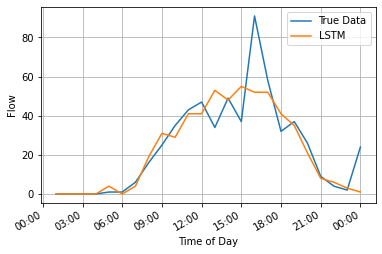

In [ ]:
plot_results(y_test, y_preds)

In [ ]:
eva_regress(y_test, predicted)

explained_variance_score:0.764558
mape:46.506136%
mae:6.458333
mse:125.958333
rmse:11.223116
r2:0.760970
